In [4]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from plotting_utilities import *

# Figure S1: Temperature tracking and variability along synthetic trajectories

In [5]:
basedir = '/work/bb1018/b380873/model_output/ICON/'
syn_traj = xr.open_dataset(basedir + 'ICON_synthetic_trajs_0V1M0A0R.nc')
T = syn_traj['temp'].isel(time=slice(0,10800))
t = syn_traj['time'].isel(time=slice(0,10800)).values

# Read in-situ data
daten = xr.open_dataset('obs/stratoclim2017.geophysika.0808_1.filtered_per_sec.nc')
j = 1942
T_Stratoclim = daten['BEST:TEMP'][j:j+10801]
t_Stratoclim = daten['time'][j:j+10801]

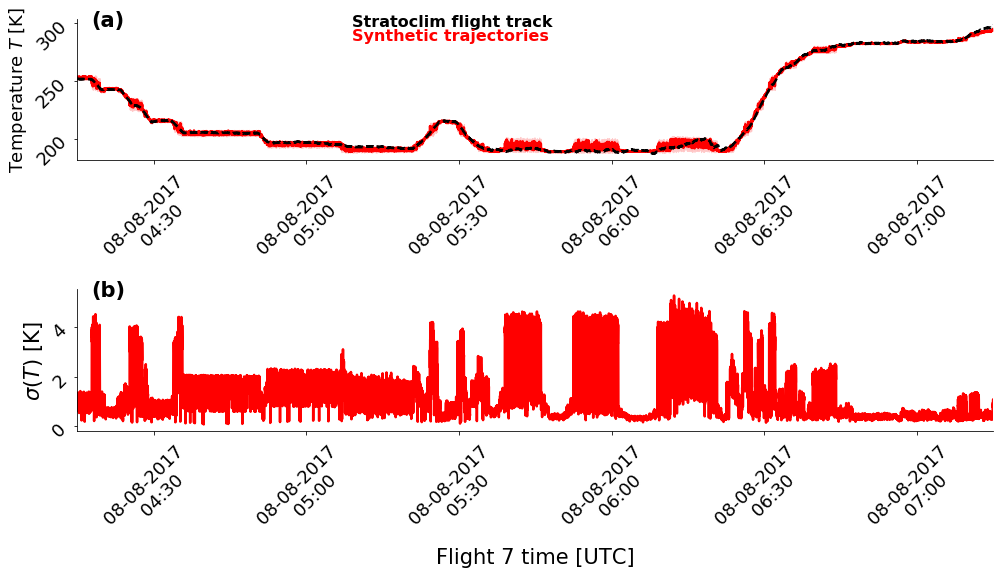

In [32]:
fs = 18
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(14,8))
Tm = T.mean(dim='ntraj')
Tstd = T.std(dim='ntraj')
ax[0].plot(t, Tm, color='red', linewidth=2.5)
ax[0].plot(t_Stratoclim, T_Stratoclim, color='k', linewidth=2.5, linestyle='--')
ax[0].fill_between(t, Tm - Tstd, Tm + Tstd, color='red', alpha=0.2)
ax[0].set_xlim([t.min(), t.max()])
ax[0].set_ylabel(r'Temperature $T$ [K]', fontsize=fs)
sexy_axes(ax[0], fs=fs)
ax[0].set_xticklabels(['08-08-2017 \n 04:30','08-08-2017 \n 05:00','08-08-2017 \n 05:30',
    '08-08-2017 \n 06:00','08-08-2017 \n 06:30','08-08-2017 \n 07:00'])
ax[0].text(0.3, 0.95, 'Stratoclim flight track', weight='bold', fontsize=fs-2, transform=ax[0].transAxes)
ax[0].text(0.3, 0.85, 'Synthetic trajectories', weight='bold', fontsize=fs-2, color='red', transform=ax[0].transAxes)
ax[0].text(0.015, 0.95, '(a)', weight='bold', fontsize=fs+3, transform=ax[0].transAxes)

ax[1].plot(t, Tstd, color='red', linewidth=2.5)
ax[1].set_xlim([t.min(), t.max()])
ax[1].set_xlabel('Flight 7 time [UTC]', fontsize=fs+3)
ax[1].set_ylabel(r'$\sigma(T)$ [K]', fontsize=fs+3)
sexy_axes(ax[1], fs)
ax[1].set_xticklabels(['08-08-2017 \n 04:30','08-08-2017 \n 05:00','08-08-2017 \n 05:30',
    '08-08-2017 \n 06:00','08-08-2017 \n 06:30','08-08-2017 \n 07:00'])
ax[1].text(0.015, 0.95, '(b)', weight='bold', fontsize=fs+3, transform=ax[1].transAxes)
plt.tight_layout()

#fig.savefig('output/syntraj_Tcheck_full.pdf',bbox_inches='tight')
plt.show()

# Figure S2: Differences in T and qv profiles between two sets of randomly-sampled synthetic trajectories